In [1]:
from PIL import Image
import numpy as np
import os
import sys

In [2]:
import glob  #file pattern matching


In [3]:
print(os.getcwd())

C:\Users\pramo\Downloads\face-to-bmi\Data


#to resize all the images to 150*150 size
width=150
height=150
img_num=0
for filename in glob.glob('Images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    im=Image.open(filename).convert('L')#pillow to load image and convert to greyscale image
    out=im.resize((width,height),Image.ANTIALIAS)
    out.save("C:/Users/pramo/Downloads/face-to-bmi/Data/Resize_images/img_{}.bmp".format(img_num))
    img_num+=1
   

In [4]:
image_list=[]
for filename in glob.glob('Resize_images/*.bmp'): #the pattern matches every pathname inthe directory test_images 
    img=Image.open(filename)#pillow to load image
    image_list.append(img)#adding images to image_list


In [5]:
len(image_list)

4206

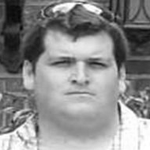

In [6]:
image_list[67]

In [7]:
#to convert images to array=>1d array=>2d array 
#appending all the image vectors to X_img vector
temp=1
for pic in image_list:
    arr=np.array(pic)#to convert image to array 
    arr_1d=arr.flatten()#to convert into 1D array
    arr_2d=arr_1d.reshape(1,22500) #to convert 1D to 2D array
    if(temp==1):
        X_img=arr_2d
        temp=0
    else:
        X_img=np.append(X_img,arr_2d,axis=0)#to add new rows to the X_image data



In [8]:
X_img.shape

(4206, 22500)

In [9]:
#standardising data(setting mean=0,variance=1)
from sklearn.preprocessing import StandardScaler

In [10]:
X_P_img=StandardScaler().fit_transform(X_img)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:

from sklearn.decomposition import PCA

In [12]:
#princinple components choosen should be 95% of variance
pca=PCA(.95)

In [13]:
#to find out principle components from X_P_img
pca.fit(X_P_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#no:of principle components
pca.n_components_

355

In [15]:
X_P_img=pca.transform(X_P_img)

In [16]:
X_P_img.shape

(4206, 355)

In [17]:

import pandas as pd
#to read_csv file
data_unclean=pd.read_csv('data.csv')
#to show top 5rows
data_unclean.head()



,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [18]:
#to remove unnamed coloums in data
data=data_unclean.loc[:,~data_unclean.columns.str.contains('^Unnamed')]

data.head()



,bmi,gender,is_training,name
0,34.207396,Male,1,img_0.bmp
1,26.453720,Male,1,img_1.bmp
2,34.967561,Female,1,img_2.bmp
3,22.044766,Female,1,img_3.bmp
4,37.758789,Female,1,img_4.bmp


In [19]:
#should include is_training?
x_train=data.loc[:,['gender']]

x_train.head()


,gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [20]:
from sklearn.preprocessing import LabelEncoder#to convert categorical data to numerical data(gender col)

In [21]:
number=LabelEncoder()


In [22]:
x_train=number.fit_transform(x_train['gender'].astype('str'))

In [23]:
x_train=x_train.reshape(4206,1)

In [24]:
y_train=data.loc[:,['bmi']]
y_train=np.array(y_train)
y_train.shape

(4206, 1)

In [25]:
X_train=np.append(x_train,X_P_img,axis=1)
X_train.shape

(4206, 356)

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [28]:
X_train.shape

(3364, 356)

In [29]:
y_train.shape


(3364, 1)

In [30]:
#pd.DataFrame(X_train)

In [31]:
X_test.shape

(842, 356)

In [32]:
X_train.shape

(3364, 356)

In [33]:
y_train=y_train.reshape(3364,)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.ensemble import AdaBoostRegressor

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:

#best parameters are n_estimators=100 and 0.01
n_est=[100]
le_rate=[0.01]
for s in n_est:
    for l in le_rate:
        regressor=AdaBoostRegressor(DecisionTreeRegressor(max_depth=2,min_samples_split=6),n_estimators=s,learning_rate=l)

        regressor.fit(X_train,y_train)

        pre_ada=regressor.predict(X_test)

        MSE_boost=mean_squared_error(y_test,pre_ada)

        score_b=regressor.score(X_test,y_test)

        print('n_estimator={},learning_rate={} MSE={} and R2={}'.format(s,l,MSE_boost,score_b))

n_estimator=100,learning_rate=0.01 MSE=76.35196786546679 and R2=-0.0009277772777656068


param_grid={'n_estimators':[100,500],'learning_rate':[0.001,0.01,0.1]}
grid=GridSearchCV(ada,param_grid)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [37]:
from matplotlib import pyplot

Text(0,0.5,'prediction')

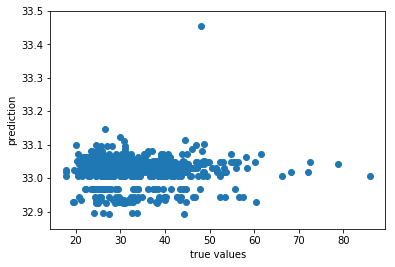

In [38]:
pyplot.scatter(y_test,pre_ada)
pyplot.xlabel('true values')
pyplot.ylabel('prediction')

In [44]:
def export_prediction_Adaboost():
    return pre_ada